### **Initialization**
* I use these 3 lines of code on top of my each notebook because it won't cause any trouble while reloading or reworking on the Project or Problem. And the third line of code helps to make visualization within the Notebook.

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Downloading the Dependencies**
* I prefer to download all necessary Libraries and Dependencies on one particular cell which mainly focus on Libraries and Dependencies.

In [30]:
# Downloading all necessary Libraries and Dependencies
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import zipfile
import tensorflow as tf

from google.colab import files
from shutil import  copyfile
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Getting the Data**
* I am using Google Colab for this Project, so the act of reading the Data might be different from different platforms. I have used the link below to download the full data of [Dog vs. Cat](https://www.kaggle.com/c/dogs-vs-cats/overview) from [Kaggle](https://www.kaggle.com/). You can manually download the Data from [Kaggle](https://www.kaggle.com/c/dogs-vs-cats/data) as well.

**Processing the Data**
* The following Python code will use OS library to access the file system and zip file library, allowing you to unzip the file.

In [31]:
# Processing the zip file of the Data
local_zip = "/content/drive/MyDrive/new/cats-and-dogs.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/content/tmp")
zip_ref.close()

In [32]:
import os
import zipfile

local_zip = "/content/drive/MyDrive/new/cats-and-dogs.zip"
extract_path = "/content/tmp"

# Create tmp folder if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Extract zip
with zipfile.ZipFile(local_zip, "r") as zip_ref:
    zip_ref.extractall(extract_path)


* Now, Let's find the total number of Cats and Dogs Images in the Data directories.

In [33]:
# Finding the total number of Cats and Dogs images in the directory.
# Total number of Cats.
print(f"Total number of Cats is {len(os.listdir('/tmp/kagglecatsanddogs_3367a/PetImages/Cat/'))}")
# Total number of Dogs.
print(f"Total number of Dogs is {len(os.listdir('/tmp/kagglecatsanddogs_3367a/PetImages/Dog/'))}")

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/kagglecatsanddogs_3367a/PetImages/Cat/'

**Creating new Directories**
* Creating a new directory for cats-vs-dogs and subdirectories for training and validation. These subdirectories will need more subdirectories for cats and dogs.

In [ ]:
# Using os.mkdir to create new directories
# Creating new directories for training and validation

os.mkdir("/tmp/kagglecatsanddogs_3367a/cats-vs-dogs")
os.mkdir("/tmp/kagglecatsanddogs_3367a/cats-vs-dogs/training")
os.mkdir("/tmp/kagglecatsanddogs_3367a/cats-vs-dogs/validation")
os.mkdir("/tmp/kagglecatsanddogs_3367a/cats-vs-dogs/training/Cats")
os.mkdir("/tmp/kagglecatsanddogs_3367a/cats-vs-dogs/training/Dogs")
os.mkdir("/tmp/kagglecatsanddogs_3367a/cats-vs-dogs/validation/Cats")
os.mkdir("/tmp/kagglecatsanddogs_3367a/cats-vs-dogs/validation/Dogs")


In [34]:
BASE_DIR = "/content/tmp/kagglecatsanddogs_3367a"
PET_DIR  = BASE_DIR + "/PetImages"
CAT_DIR  = PET_DIR + "/Cat"
DOG_DIR  = PET_DIR + "/Dog"


In [35]:
import os

print(f"Total number of Cats: {len(os.listdir(CAT_DIR))}")
print(f"Total number of Dogs: {len(os.listdir(DOG_DIR))}")


Total number of Cats: 12491
Total number of Dogs: 12470


In [36]:
TRAIN_DIR = BASE_DIR + "/cats-vs-dogs/training"
VAL_DIR   = BASE_DIR + "/cats-vs-dogs/validation"

os.makedirs(TRAIN_DIR + "/Cats", exist_ok=True)
os.makedirs(TRAIN_DIR + "/Dogs", exist_ok=True)
os.makedirs(VAL_DIR + "/Cats", exist_ok=True)
os.makedirs(VAL_DIR + "/Dogs", exist_ok=True)


**Splitting the Data into Training and Validation**
* I will write a function which will takes a SOURCE directory containing the files, a TRAINING directory that a portion of files will be copied to, a VALIDATION directory that a portion of files will be copied to, and SPLIT_SIZE to determine the portion. 90% of the Images will be copied into TRAINING directory and remaining 10% of the Images will be copied into VALIDATION directory. Every Images will be checked, if any of the Images has zero file length then they won't be copied over.

In [37]:
# Writing the function which splits the data into Training and Validation or Testing.
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
  files = []
  for filename in os.listdir(SOURCE):
    file = SOURCE + filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print(filename, "is zero length, so ignoring!")

  training_length = int(len(files) * SPLIT_SIZE)
  validation_length = int(len(files) - training_length)
  shuffled_set = random.sample(files, len(files))
  training_set = shuffled_set[0:training_length]
  validation_set = shuffled_set[0:validation_length]

  for filename in training_set:
    this_file = SOURCE + filename
    destination = TRAINING + filename
    copyfile(this_file, destination)

  for filename in validation_set:
    this_file = SOURCE + filename
    destination = VALIDATION + filename
    copyfile(this_file, destination)


# CAT_SOURCE_DIR = "/tmp/kagglecatsanddogs_3367a/PetImages/Cat/"
# TRAINING_CAT_DIR = "/tmp/kagglecatsanddogs_3367a/cats-vs-dogs/training/Cats/"
# VALIDATION_CAT_DIR = "/tmp/kagglecatsanddogs_3367a/cats-vs-dogs/validation/Cats/"

# DOG_SOURCE_DIR = "/tmp/kagglecatsanddogs_3367a/PetImages/Dog/"
# TRAINING_DOG_DIR = "/tmp/kagglecatsanddogs_3367a/cats-vs-dogs/training/Dogs/"
# VALIDATION_DOG_DIR = "/tmp/kagglecatsanddogs_3367a/cats-vs-dogs/validation/Dogs/"

BASE_DIR = "/content/tmp/kagglecatsanddogs_3367a"

CAT_SOURCE_DIR = BASE_DIR + "/PetImages/Cat/"
DOG_SOURCE_DIR = BASE_DIR + "/PetImages/Dog/"

TRAINING_CAT_DIR = BASE_DIR + "/cats-vs-dogs/training/Cats/"
VALIDATION_CAT_DIR = BASE_DIR + "/cats-vs-dogs/validation/Cats/"

TRAINING_DOG_DIR = BASE_DIR + "/cats-vs-dogs/training/Dogs/"
VALIDATION_DOG_DIR = BASE_DIR + "/cats-vs-dogs/validation/Dogs/"



SPLIT_SIZE = 0.9

split_data(CAT_SOURCE_DIR, TRAINING_CAT_DIR, VALIDATION_CAT_DIR, SPLIT_SIZE)
split_data(DOG_SOURCE_DIR, TRAINING_DOG_DIR, VALIDATION_DOG_DIR, SPLIT_SIZE)

* Finding the total number of Images in Training and Validation Dataset. The Training Dataset has 90% of the total Images present in the directory and Validation Dataset has 10% of the total Images present in the directory.

In [38]:
# Total number of images in Training
print(f"Total number of training Cats is {len(os.listdir('/content/tmp/kagglecatsanddogs_3367a/cats-vs-dogs/training/Cats/'))}")
print(f"Total number of training Dogs is {len(os.listdir('/content/tmp/kagglecatsanddogs_3367a/cats-vs-dogs/training/Dogs/'))}")

# Total number of images in Validation
print(f"Total number of validation Cats is {len(os.listdir('/content/tmp/kagglecatsanddogs_3367a/cats-vs-dogs/validation/Cats/'))}")
print(f"Total number of validation Dogs is {len(os.listdir('/content/tmp/kagglecatsanddogs_3367a/cats-vs-dogs/validation/Dogs/'))}")

Total number of training Cats is 12367
Total number of training Dogs is 12345
Total number of validation Cats is 2386
Total number of validation Dogs is 2371


* Let's define each of these directories as follows:

In [39]:
# Directory with training cats images
train_cats_dir = os.path.join("/content/tmp/kagglecatsanddogs_3367a/cats-vs-dogs/training/Cats")

# Directory with training dogs images.
train_dogs_dir = os.path.join("/content/tmp/kagglecatsanddogs_3367a/cats-vs-dogs/training/Dogs")

# Directory with validation cats images
validation_cats_dir = os.path.join("/content/tmp/kagglecatsanddogs_3367a/cats-vs-dogs/validation/Cats")

# Directory with validation dogs images
validation_dogs_dir = os.path.join("/content/tmp/kagglecatsanddogs_3367a/cats-vs-dogs/validation/Dogs")

* Now, Let's look at the filenames in cats and dogs training and validation directories.

In [40]:
# Training Cat directory
train_cat_names = os.listdir(train_cats_dir)
print(train_cat_names[:10])

# Training Dog directory
train_dog_names = os.listdir(train_dogs_dir)
print(train_dog_names[:10])

# Validation Cat directory
validation_cat_names = os.listdir(validation_cats_dir)
print(validation_cat_names[:10])

# Validation Dog directory
validation_dog_names = os.listdir(validation_dogs_dir)
print(validation_dog_names[:10])

['1373.jpg', '11301.jpg', '4945.jpg', '1610.jpg', '691.jpg', '3489.jpg', '10689.jpg', '4718.jpg', '6200.jpg', '2526.jpg']
['1373.jpg', '11301.jpg', '4945.jpg', '1610.jpg', '691.jpg', '3489.jpg', '10689.jpg', '4718.jpg', '6200.jpg', '2526.jpg']
['1610.jpg', '691.jpg', '3489.jpg', '4718.jpg', '1224.jpg', '2815.jpg', '8545.jpg', '3877.jpg', '3569.jpg', '10160.jpg']
['1610.jpg', '3489.jpg', '10572.jpg', '7157.jpg', '6461.jpg', '3877.jpg', '3328.jpg', '4835.jpg', '6197.jpg', '3335.jpg']


**Data Visualization**
* Now, Let's look at the few pictures of the Images to get the sense of how does the Data actually looks like.

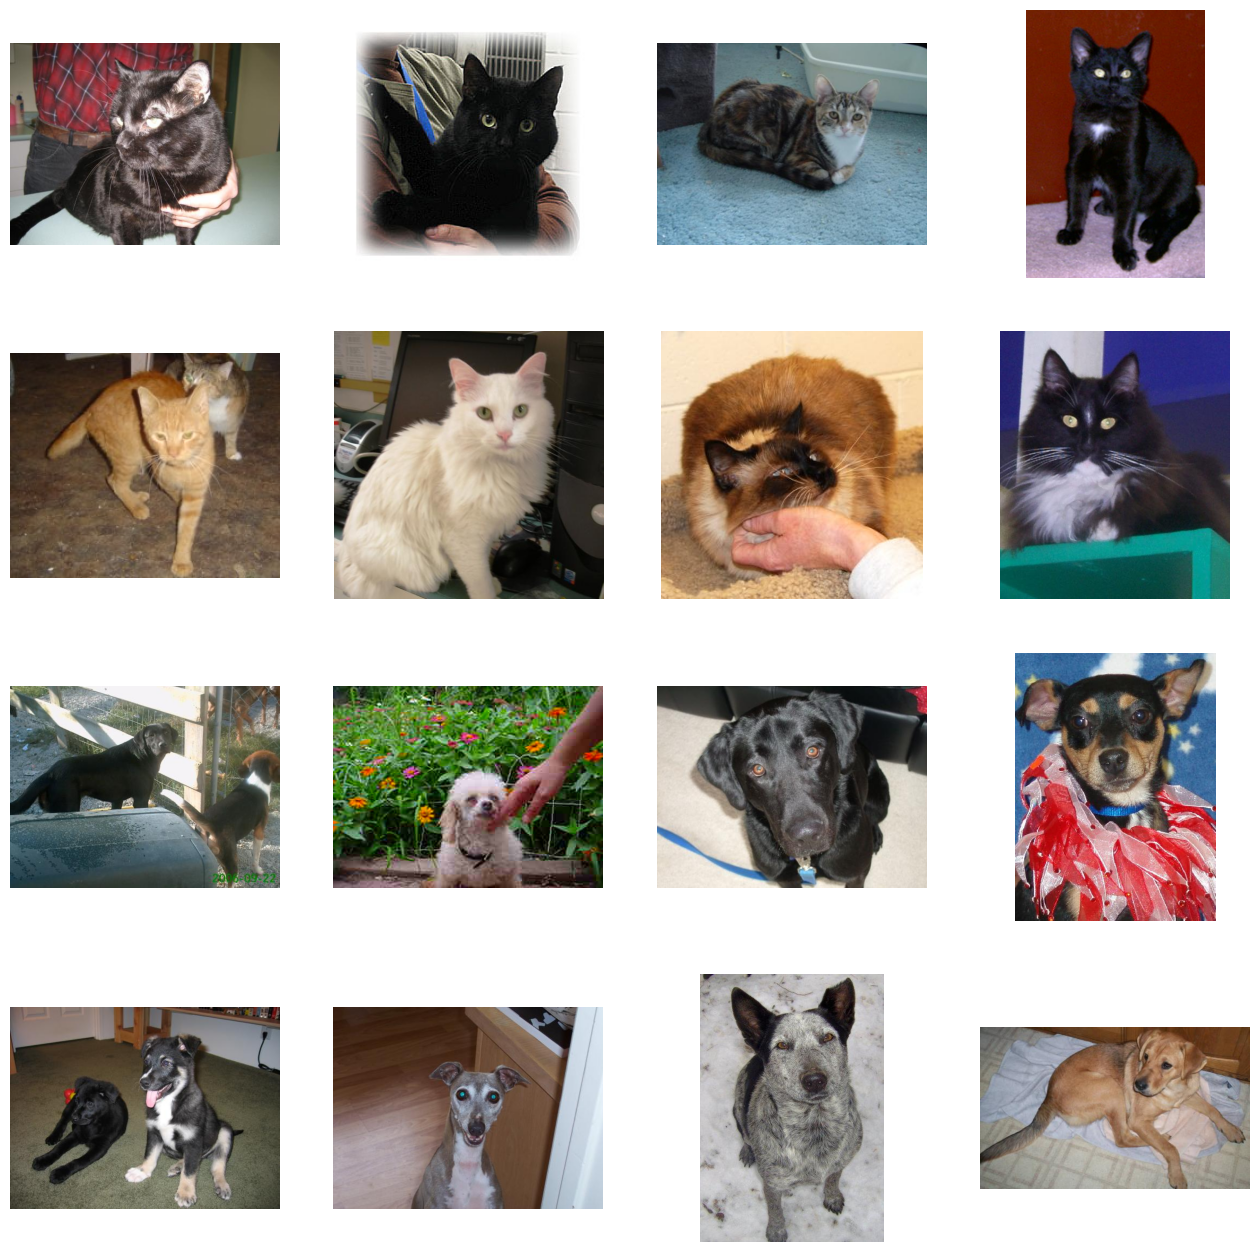

In [41]:
# Parameters for our graph
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Setup matplotlib figure
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8
next_cat_px = [os.path.join(train_cats_dir, fname) for fname in train_cat_names[pic_index-8:pic_index]]
next_dog_px = [os.path.join(train_dogs_dir, fname) for fname in train_dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_px + next_dog_px):
  # Set subplots
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis("Off")

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

### **Convolutional Neural Network : InceptionV3**
* Building Convolutional Neural Network from scratch using Tensorflow and Keras API.
* Using InceptionV3 for the purpose of transfer learning.
* Since it is a two class Classification problem i.e a Binary Classfication problem, I will use sigmoid activation so that the output of my network will be a single scalar between 0 and 1, encodig the probability of the images.

In [42]:
# Creating convolutional neural network with transfer learning.
# Creating the pretrained model
pre_trained_model = InceptionV3(input_shape=(300, 300, 3),
                                weights="imagenet",
                                include_top=False)

# Making all the layers in pretrained model nontrainable
# Freezing all the layers of pretrained model
for layer in pre_trained_model.layers:
  layer.trainable = False

# Summary of the Model
pre_trained_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 300, 300,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_94 (Conv2D)  │ (None, 149, 149,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_94[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_95 (Conv2D)  │ (None, 147, 147,  │      9,216 │ activation_94[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_95[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, 147, 147,  │     18,432 │ activation_95[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_96[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 73, 73,    │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, 73, 73,    │      5,120 │ max_pooling2d_4[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_97[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, 71, 71,    │    138,240 │ activation_97[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_98[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

**Processing the Model**
* Working on pretrained model.

In [43]:
# Working on pretrained model.
# last_layer = pre_trained_model.get_layer("mixed9")
# print(f"The shape of last output layer is {last_layer.output_shape}")
# last_output = last_layer.output
last_layer = pre_trained_model.get_layer("mixed9")
last_output = last_layer.output

print(f"The shape of last output layer is {last_output.shape}")


The shape of last output layer is (None, 8, 8, 2048)


**Callbacks**
* It stops the further execution of the program when the certain accuracy is achieved. I will build the callbacks which will stop the execution of the program after 99% accuracy is achieved by the model.

In [44]:
# Building the Callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get("accuracy") > 0.99):
      print("\nReached 99% accurcy so stopping the execution of the program!")
      self.model.stop_training = True

# Instantiation
callbacks = myCallback()

**Processing the Model**
* Preparing the Final Model from pretrained model.

In [45]:
# Processing the Model

# Flatten the output layer of pretrained model into 1 dimension
x = tf.keras.layers.Flatten()(last_output)
# Adding fully connected layer with relu activation
x = tf.keras.layers.Dense(units=1024, activation="relu")(x)
# Adding dropout with rate 0.2
x = tf.keras.layers.Dropout(0.2)(x)
# Adding final sigmoid layer for activation
x = tf.keras.layers.Dense(1, activation="sigmoid")(x)

# Preparing the final Model
model = Model(pre_trained_model.input, x)

* Next, I will configure the specifications for model training. I will train the model with binary_crossentropy loss, because it is a binary classification problem and the activation is sigmoid.
* Here, I will be using RMSprop which is preferable for Stochastic Gradient Descent because RMSprop automates learning rate tuning for us.

In [46]:
# Compile the Model
# model.compile(loss="binary_crossentropy",
#               optimizer=RMSprop(lr=0.0001),
#               metrics=["accuracy"])

from tensorflow.keras.optimizers import RMSprop

model.compile(
    loss="binary_crossentropy",
    optimizer=RMSprop(learning_rate=0.0001),
    metrics=["accuracy"]
)


* Let's look at the summary of the Neural Network.

In [47]:
# Summary of Neural Network
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 300, 300,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_94 (Conv2D)  │ (None, 149, 149,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_94[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_95 (Conv2D)  │ (None, 147, 147,  │      9,216 │ activation_94[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_95[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, 147, 147,  │     18,432 │ activation_95[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_96[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 73, 73,    │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, 73, 73,    │      5,120 │ max_pooling2d_4[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_97[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, 71, 71,    │    138,240 │ activation_97[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_98[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 149,942,497 (571.99 MB)

 Trainable params: 134,219,777 (512.01 MB)

 Non-trainable params: 15,722,720 (59.98 MB)

**Data Processing**
* I will process our images by normalizing pixel values in range of [0, 1] which is originally in range of [0, 255]

In [48]:
# Normalizing all the images
# All images are rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode="nearest")

validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    "/content/tmp/kagglecatsanddogs_3367a/cats-vs-dogs/training",
    target_size=(300, 300),
    batch_size=128,
    class_mode="binary"
)

# Flow validation images in batches of 32 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
    "/content/tmp/kagglecatsanddogs_3367a/cats-vs-dogs/validation",
    target_size=(300, 300),
    batch_size=32,
    class_mode="binary"
)

Found 24710 images belonging to 2 classes.
Found 4757 images belonging to 2 classes.


### **Training the Model**
* I will train the Model for 100 epochs and 8 epoch per steps.
* The Loss and Accuracy are the great indication of the progress of training. It's making a guess to the classification of the training data and then measuring it against the known label calculating the result. Accuracy is the portion of the correct guesses.

In [49]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=50,
    verbose=2,
    validation_data=validation_generator,
    validation_steps=8,
    callbacks=[callbacks]
)
MODEL_DIR = "./cats-vs-dogs-inceptionv3"

model.save(MODEL_DIR)   # TensorFlow SavedModel format
print("✅ Model saved locally")


Epoch 1/50
8/8 - 42s - 5s/step - accuracy: 0.8076 - loss: 0.9946 - val_accuracy: 0.9727 - val_loss: 0.0814
Epoch 2/50
8/8 - 37s - 5s/step - accuracy: 0.9746 - loss: 0.0746 - val_accuracy: 0.9805 - val_loss: 0.0321
Epoch 3/50
8/8 - 22s - 3s/step - accuracy: 0.9590 - loss: 0.1084 - val_accuracy: 0.9961 - val_loss: 0.0157
Epoch 4/50
8/8 - 23s - 3s/step - accuracy: 0.9844 - loss: 0.0413 - val_accuracy: 0.9883 - val_loss: 0.0450
Epoch 5/50
8/8 - 23s - 3s/step - accuracy: 0.9609 - loss: 0.1023 - val_accuracy: 0.9922 - val_loss: 0.0226
Epoch 6/50
8/8 - 24s - 3s/step - accuracy: 0.9805 - loss: 0.0478 - val_accuracy: 0.9961 - val_loss: 0.0162
Epoch 7/50
8/8 - 24s - 3s/step - accuracy: 0.9824 - loss: 0.0428 - val_accuracy: 0.9883 - val_loss: 0.0197
Epoch 8/50
8/8 - 24s - 3s/step - accuracy: 0.9746 - loss: 0.0638 - val_accuracy: 0.9922 - val_loss: 0.0231
Epoch 9/50
8/8 - 23s - 3s/step - accuracy: 0.9863 - loss: 0.0418 - val_accuracy: 0.9961 - val_loss: 0.0095
Epoch 10/50
8/8 - 24s - 3s/step - acc

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=./cats-vs-dogs-inceptionv3.

In [50]:
model.save("cats-vs-dogs-inceptionv3.keras")
print("✅ Model saved in Keras format")


✅ Model saved in Keras format


In [51]:
from huggingface_hub import notebook_login
notebook_login()


In [52]:
from huggingface_hub import create_repo

REPO_ID = "MehfuzAlam/cats-and-dogs-inceptionv3"

create_repo(
    repo_id=REPO_ID,
    repo_type="model",
    exist_ok=True
)

print("✅ Hugging Face repo created")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


✅ Hugging Face repo created


In [54]:
from huggingface_hub import upload_file

upload_file(
    path_or_fileobj="/content/cats-vs-dogs-inceptionv3.keras",
    path_in_repo="cats-vs-dogs-inceptionv3.keras",
    repo_id=REPO_ID,
    repo_type="model"
)

print("🚀 Model file uploaded to Hugging Face Hub")


Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...vs-dogs-inceptionv3.keras:   0%|          |  561kB / 1.14GB            

🚀 Model file uploaded to Hugging Face Hub


**Model Visualization**
* Plotting Loss vs Accuracy

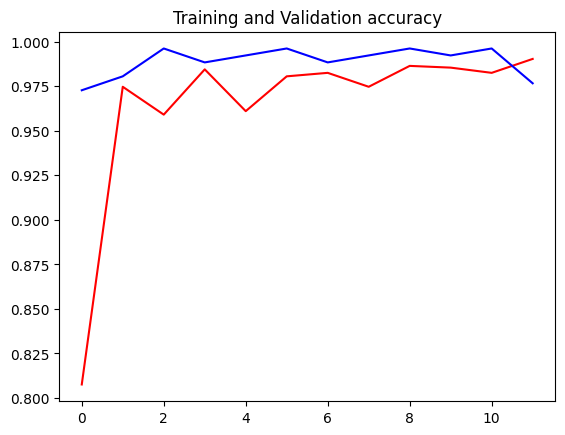

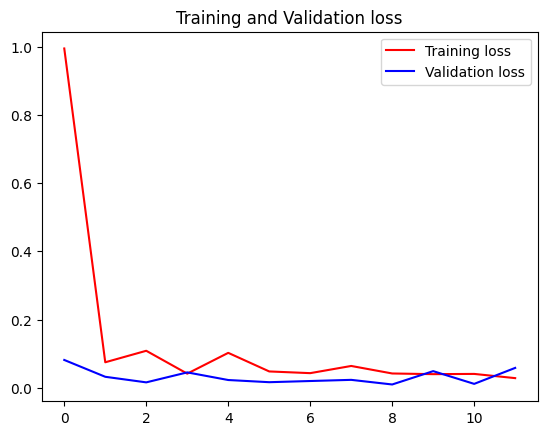

In [55]:
# Plotting loss vs accuracy

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "r", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and Validation accuracy")

plt.figure()

plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation loss")

plt.legend()
plt.show()

In [57]:
from huggingface_hub import snapshot_download
import tensorflow as tf
import os

MODEL_DIR = snapshot_download(
    repo_id="MehfuzAlam/cats-and-dogs-inceptionv3"
)

MODEL_FILE = os.path.join(
    MODEL_DIR,
    "cats-vs-dogs-inceptionv3.keras"
)

model = tf.keras.models.load_model(MODEL_FILE)

print("✅ Model loaded from Hugging Face successfully")


Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

✅ Model loaded from Hugging Face successfully


**Model in Production**
* Now, Let's look at actually running a prediction using our model. The code below will allow you to choose 1 or more files from your file system. It will then upload and run the model and give indication wheather the object is cat or a dog.

In [58]:
from google.colab import files
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
import numpy as np

uploaded = files.upload()

for fn in uploaded.keys():
    path = "/content/" + fn
    img = image.load_img(path, target_size=(300, 300))

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)   # 🔥 CRITICAL FIX

    pred = model.predict(x)[0][0]
    print("Prediction score:", pred)

    if pred > 0.5:
        print(fn, "is a Dog")
    else:
        print(fn, "is a Cat")


Saving dcic2.jpg to dcic2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
Prediction score: 0.000112742426
dcic2.jpg is a Cat


In [59]:
# Create FastAPI app and endpoints (Cat vs Dog)

from fastapi import FastAPI, File, UploadFile, HTTPException
from fastapi.middleware.cors import CORSMiddleware
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
import os
from PIL import Image

app = FastAPI()

app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

UPLOAD_DIR = "/content/uploads"
os.makedirs(UPLOAD_DIR, exist_ok=True)

@app.post("/predict")
async def predict_image(file: UploadFile = File(...)):
    try:
        file_path = os.path.join(UPLOAD_DIR, file.filename)

        with open(file_path, "wb") as f:
            f.write(await file.read())

        # Load and preprocess image
        img = Image.open(file_path).convert("RGB")
        img = img.resize((300, 300))

        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        prediction = model.predict(x)[0][0]

        label = "dog" if prediction > 0.5 else "cat"

        return {
            "label": label,
            "confidence": float(prediction)
        }

    except Exception as e:
        raise HTTPException(status_code=500, detail=str(e))


In [60]:
!pip install pyngrok
from pyngrok import ngrok


In [63]:
import getpass

API_KEY = getpass.getpass("Enter your ngrok API key: ")
print("API key loaded safely!")


Enter your ngrok API key: ··········
API key loaded safely!


In [64]:
import nest_asyncio
import uvicorn

print("Setting up ngrok...")
ngrok.set_auth_token(API_KEY)

public_url = ngrok.connect(8000)
print("Public URL:", public_url.public_url)

print("Starting server...")
nest_asyncio.apply()

config = uvicorn.Config(app, host="0.0.0.0", port=8000, loop="asyncio")
server = uvicorn.Server(config)

await server.serve()


Setting up ngrok...
Public URL: https://reverential-lola-uninvented.ngrok-free.dev
Starting server...


INFO:     Started server process [1443]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
INFO:     2405:acc0:1204:7019:4994:cbd9:991:42a2:0 - "POST /predict HTTP/1.1" 200 OK
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
INFO:     2405:acc0:1204:7019:4994:cbd9:991:42a2:0 - "POST /predict HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [1443]
